In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:

data = pd.read_csv('./teste.csv')
data.head(5)

,time,open,high,low,close,Volume,Volume MA,ParabolicSAR,Conversion Line,Base Line,...,Plot,Histogram,MACD,Signal,%K,%D,MOM,Accumulation/Distribution,ATR,Bollinger Bands Width
0,2011-08-18T00:00:00Z,10.90,10.90,10.90,10.90,0.489908,NaN,NaN,NaN,NaN,...,50,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
1,2011-08-19T00:00:00Z,11.85,11.85,11.15,11.69,1.926578,NaN,10.90000,NaN,NaN,...,50,NaN,NaN,NaN,NaN,NaN,NaN,1.045857,NaN,NaN
2,2011-08-20T00:00:00Z,11.70,11.70,11.70,11.70,0.085470,NaN,10.90000,NaN,NaN,...,50,NaN,NaN,NaN,NaN,NaN,NaN,1.045857,NaN,NaN
3,2011-08-21T00:00:00Z,11.70,11.70,11.70,11.70,0.085470,NaN,10.91900,NaN,NaN,...,50,NaN,NaN,NaN,NaN,NaN,NaN,1.045857,NaN,NaN
4,2011-08-22T00:00:00Z,11.70,11.70,11.70,11.70,0.028632,NaN,10.93762,NaN,NaN,...,50,NaN,NaN,NaN,NaN,NaN,NaN,1.045857,NaN,NaN


In [3]:
data['time'] = data['time'].str.slice(0, 9)
data = data[data['time'] >= '2012-01-01']
data['Close d+1'] = data['close'].shift(-1)
data.columns

Index(['time', 'open', 'high', 'low', 'close', 'Volume', 'Volume MA',
       'ParabolicSAR', 'Conversion Line', 'Base Line', 'Lagging Span',
       'Leading Span A', 'Leading Span B', 'Kumo Cloud Upper Line',
       'Kumo Cloud Lower Line', 'Basis', 'Upper', 'Lower', 'EMA',
       'Smoothing Line', 'MA', 'Smoothing Line.1', 'Volume.1', 'Volume MA.1',
       'RSI', 'RSI-based MA', 'Upper Bollinger Band', 'Lower Bollinger Band',
       'Plot', 'Histogram', 'MACD', 'Signal', '%K', '%D', 'MOM',
       'Accumulation/Distribution', 'ATR', 'Bollinger Bands Width',
       'Close d+1'],
      dtype='object')

In [4]:
# Drop last line for Close d+1 nan
data = data.drop(data.index[len(data)-1])

columns_to_drop = ['Lagging Span', 'Upper Bollinger Band' , 'Lower Bollinger Band']
data = data.drop(columns_to_drop, axis=1)
for name in data.columns:
    for i, value in enumerate(data[name]):
        if pd.isna(value):
            print(name, ': ', i, ' ', value)

In [5]:
# Drop last line for Close d+1 nan
# data = data.drop(data.index[len(data)-1])

In [6]:
# data = data.drop(['Lagging Span', 'Upper Bollinger Band' , 'Lower Bollinger Band',])

Random Forest

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [8]:
train,test = train_test_split(data,test_size=0.3,train_size=0.7)

In [9]:
#Create new Df with only the target for test and train 
Y_regress_rfg = train[['Close d+1']]
Y_test_rfg = test[['Close d+1']]

#Create new Df with only the features for test and train 
columns_to_drop = ['time', 'close', 'Close d+1']
X_regress_rfg = train.drop(columns=columns_to_drop)
X_test_rfg = test.drop(columns=columns_to_drop)


In [10]:
X_regress_rfg.columns

Index(['open', 'high', 'low', 'Volume', 'Volume MA', 'ParabolicSAR',
       'Conversion Line', 'Base Line', 'Leading Span A', 'Leading Span B',
       'Kumo Cloud Upper Line', 'Kumo Cloud Lower Line', 'Basis', 'Upper',
       'Lower', 'EMA', 'Smoothing Line', 'MA', 'Smoothing Line.1', 'Volume.1',
       'Volume MA.1', 'RSI', 'RSI-based MA', 'Plot', 'Histogram', 'MACD',
       'Signal', '%K', '%D', 'MOM', 'Accumulation/Distribution', 'ATR',
       'Bollinger Bands Width'],
      dtype='object')

In [11]:
#Create object RandomForestRegressor
Forest = RandomForestRegressor(random_state=0 , n_jobs=-1, n_estimators=10000)
#Train the model using the training sets
Forest.fit(X_regress_rfg,Y_regress_rfg)
#Predict the response 
predicted_value = Forest.predict(X_test_rfg)

C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\arthu\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed

In [12]:
value_predict_rfg = pd.DataFrame({'Predicted Value':predicted_value,'Value':Y_test_rfg['Close d+1']})
value_predict_rfg.head()

,Predicted Value,Value
2252,7919.471299,8226.17
676,88.988139,90.16
3192,9520.067706,9461.29
243,5.029277,5.07
3388,27216.675538,28881.30


In [13]:
value_predict_rfg

,Predicted Value,Value
2252,7919.471299,8226.17
676,88.988139,90.16
3192,9520.067706,9461.29
243,5.029277,5.07
3388,27216.675538,28881.30
...,...,...
2065,1768.663847,1782.99
2110,2536.570855,2412.41
2566,6539.067665,6597.81
1677,454.427256,460.02


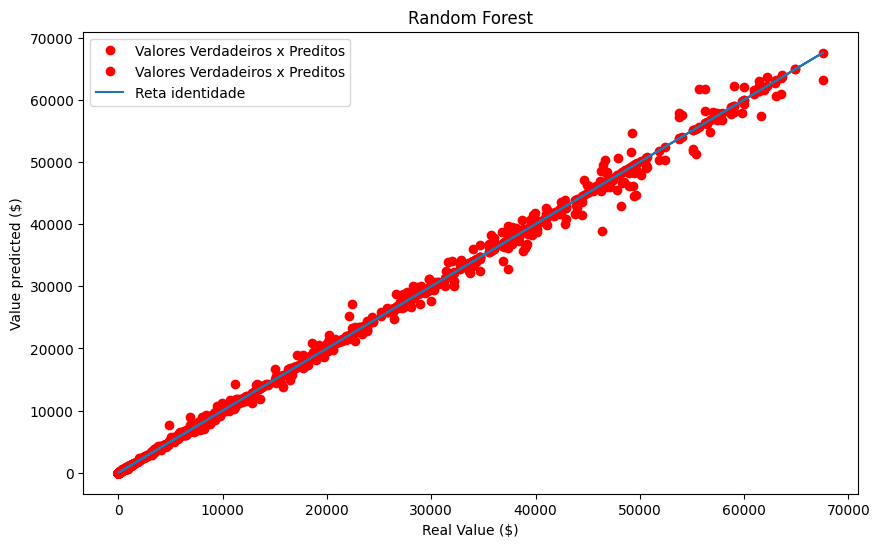

In [19]:
plt.figure(figsize=(10,6))
plt.plot(Y_test_rfg['Close d+1'], value_predict_rfg, 'ro',label='Valores Verdadeiros x Preditos')
plt.plot(Y_test_rfg['Close d+1'],Y_test_rfg['Close d+1'],label='Reta identidade')
plt.legend()
plt.title('Random Forest')
plt.xlabel('Real Value ($)')
plt.ylabel('Value predicted ($)')
plt.show()